# Imports

In [1]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
import plotter
from clean import BlockModelCleaner

output_dir = "../outputs/het_analysis_block_model/"
SAVE = True

%matplotlib widget

# Data Input and Cleaning

In [6]:
df = BlockModelCleaner.get_processed_data()
filtered_df = df.query('CU > 0.001')

In [7]:
df

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
block_id,,,,,,,,,,,,,,,,,,,,,
5704,736551.1108,9549309.463,2197.5,15,15,15,3375,4,0,0,...,1,1,1,0,0.042984,0.011875,0.015459,5.824081,99.441338,2.669284
5705,736562.9309,9549300.228,2197.5,15,15,15,3375,4,0,0,...,1,1,1,0,0.079286,0.021141,0.028952,5.816086,99.441345,2.668900
5706,736574.7511,9549290.993,2197.5,15,15,15,3375,4,0,0,...,1,1,1,0,0.086683,0.023021,0.031294,5.732633,99.441292,2.668314
5707,736586.5712,9549281.758,2197.5,15,15,15,3375,4,0,0,...,1,1,1,0,0.023824,0.006867,0.008367,5.681741,99.441269,2.666521
5870,736548.5255,9549330.518,2197.5,15,15,15,3375,4,0,0,...,1,1,1,0,0.073092,0.018146,0.024723,5.846222,99.441444,2.670569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972171,737489.7278,9549585.004,3112.5,15,15,15,3375,1,0,0,...,11,8,6,0,0.118165,0.005452,0.001053,2.452983,40.414120,2.624315
972172,737501.5479,9549575.769,3112.5,15,15,15,3375,1,0,0,...,11,8,6,0,0.118544,0.005238,0.001066,2.474509,36.867237,2.619188
972173,737513.3681,9549566.534,3112.5,15,15,15,3375,1,0,0,...,11,8,6,0,0.124945,0.005123,0.001044,2.448752,33.431408,2.619333


# Grouping

In [4]:
elements = [
    'CU',
    'AG',
    'AU'
]

combined = {}

for element in elements:
    try:
        combined[element] = HetAnalysis(
            f'BM_{element}', 
            df['sg'], 
            df[element]
        ) # can multiply sg by volume if volumes are different
    except:
        print(f'Invalid data for BM_{element}')

In [9]:
filtered = {}

for element in elements:
    try:
        filtered[element] = HetAnalysis(
            f'BM_{element}', 
            filtered_df['sg'], 
            filtered_df[element]
        )
    except:
        print(f'Invalid data for BM_{element}')

# Visualize

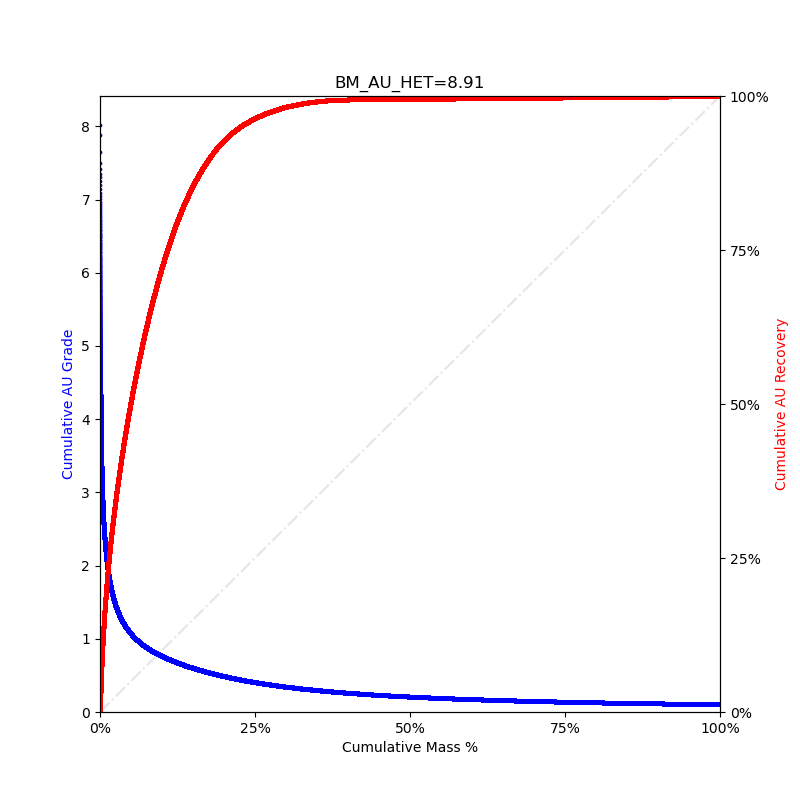

In [5]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = combined[element].get_heterogeneity()
        info = combined[element].get_info()
            
        if len(info) > 0:
            ax.set_title(f'BM_{element}_HET={het:.2f}')
            plotter.plot_grade_recovery_curve(ax, info, element)

            save_loc = output_dir + f'combined/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'BM_{element}.png', format='png', dpi=200)

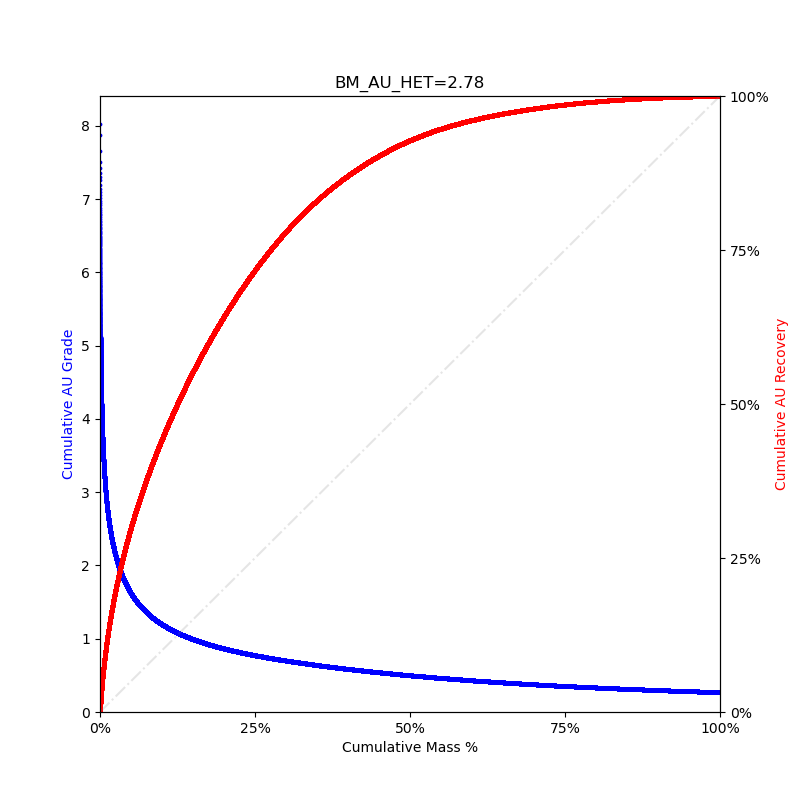

In [10]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = filtered[element].get_heterogeneity()
        info = filtered[element].get_info()
            
        if len(info) > 0:
            ax.set_title(f'BM_{element}_HET={het:.2f}')
            plotter.plot_grade_recovery_curve(ax, info, element)

            save_loc = output_dir + f'filtered/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'BM_{element}.png', format='png', dpi=200)